In [74]:
import seaborn as sb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import data
data1 = pd.read_csv('../../data/energy_dataset.csv')
data2 = pd.read_csv('../../data/weather_features.csv')
data2 = data2.loc[data2["city_name"]=='Valencia']


# merge data
df = pd.merge(data1, data2,left_on="time",right_on="dt_iso")

# 
for i in range(len(df)):
    if(df.iloc[i]["time"] != df.iloc[i]["dt_iso"]):
        df.drop(i,axis=0,inplace=True)
        i-=1

df=df.drop(columns=["temp_max","temp_min"])

cList = []

# list of tuples of data and correlation
for col1 in data2.columns:
    for col2 in data1.columns:
        if col1 != col2 and col1 in df and col2 in df:
            cf=df[[col1,col2]].corr()
            if col1 in cf and col2 in cf:
                num = cf[col2].iloc[0]
                if np.isnan(num)==False and num<1:
                    cList.append((num,col1,col2))
   
# sort tuples based on correlation
cList.sort(reverse=True,key = lambda x: abs(x[0]))

#print(df)
#df = pd.read_csv("energy_dataset.csv")
hd=df[["total load actual","temp","pressure","humidity","wind_speed","rain_3h","clouds_all"]]
#print(hd)
#hd = df.drop(["use [kW]","Furnace 1 [kW]","Home office [kW]","Wine cellar [kW]","Kitchen 12 [kW]","Garage door [kW]","Fridge [kW]","Furnace 2 [kW]","Dishwasher [kW]","gen [kW]","Kitchen 38 [kW]","Kitchen 14 [kW]","Barn [kW]","Well [kW]","Microwave [kW]","Living room [kW]","Solar [kW]"],axis=1)
#print(hd)
#sb.heatmap(hd.corr(),annot=True)

humidity | generation solar
-0.5048580828003194


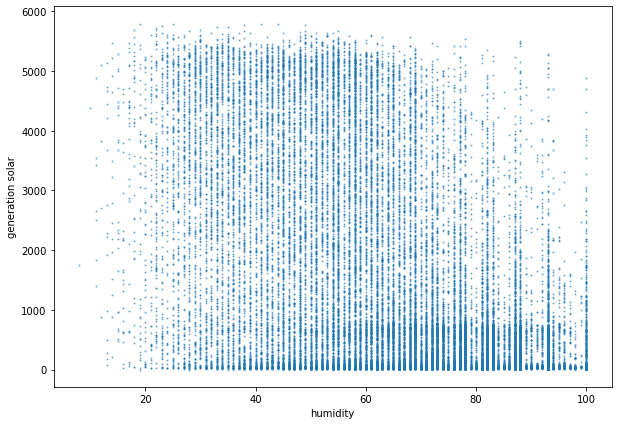

humidity | forecast solar day ahead
-0.503190877790285


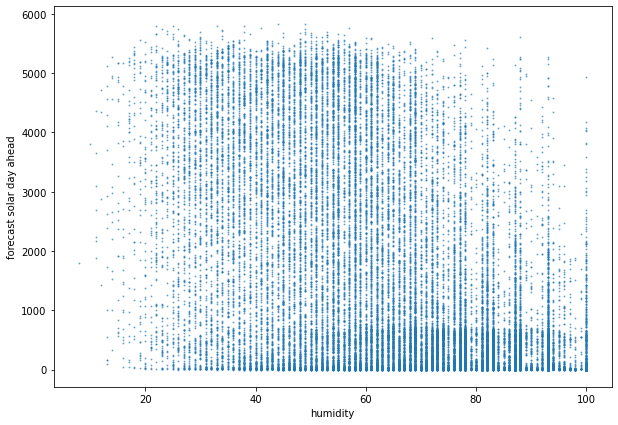

temp | forecast solar day ahead
0.46058445627952566


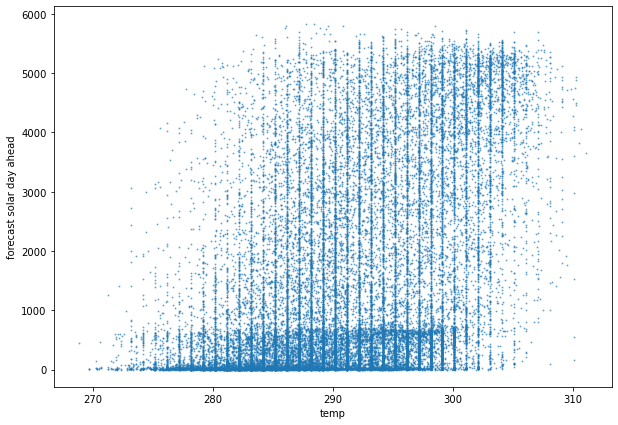

temp | generation solar
0.4568216038139313


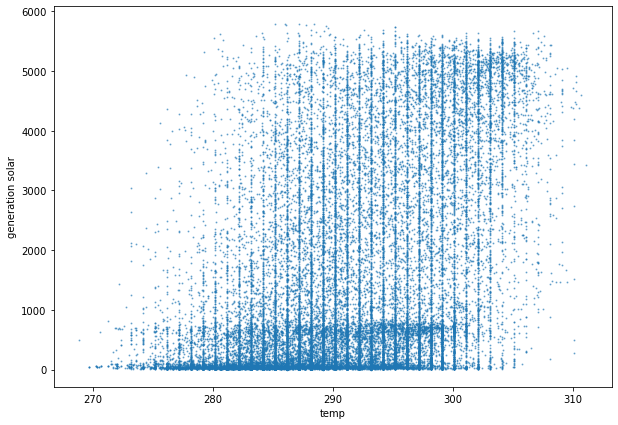

humidity | total load forecast
-0.3156456576354638


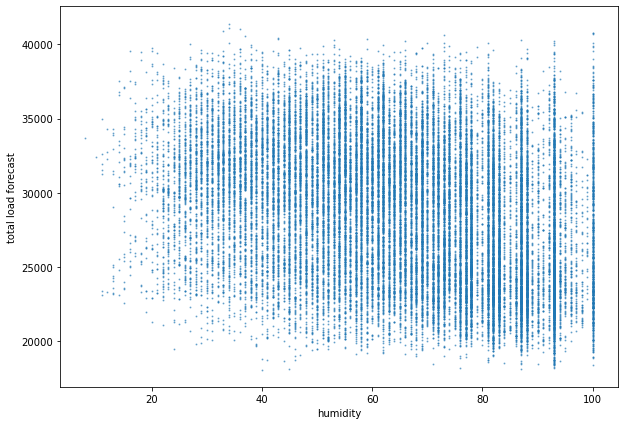

humidity | total load actual
-0.31398806179699945


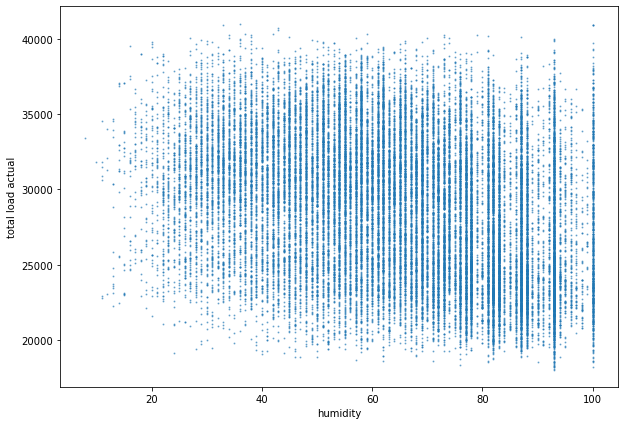

wind_speed | generation wind onshore
0.26356309492490276


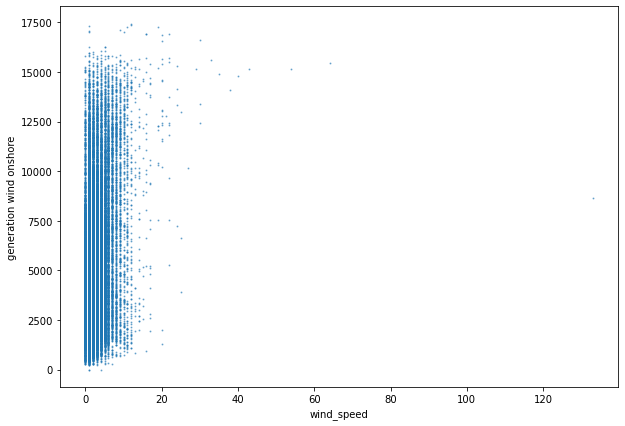

wind_speed | forecast wind onshore day ahead
0.26345579508075595


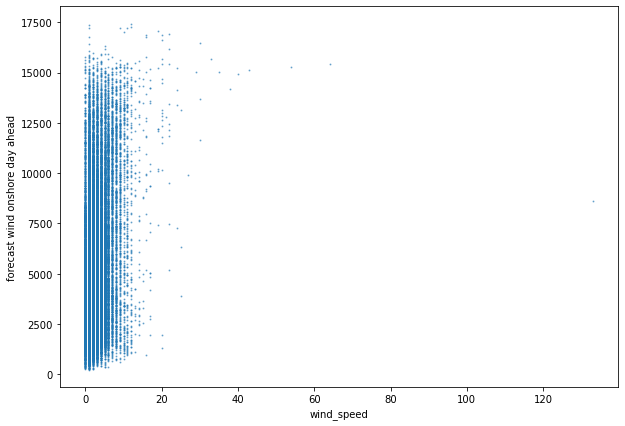

temp | total load actual
0.22099728116340792


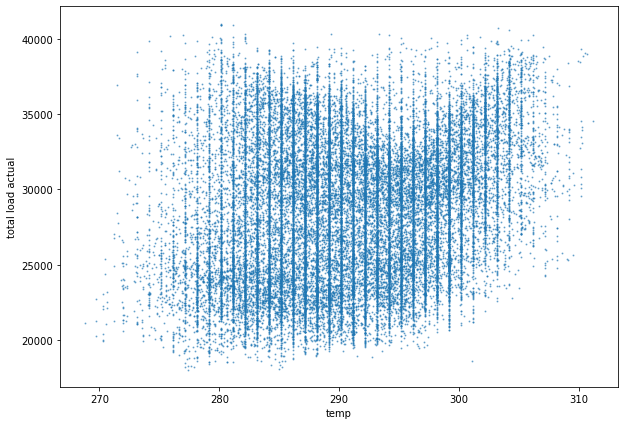

temp | total load forecast
0.21915786603656348


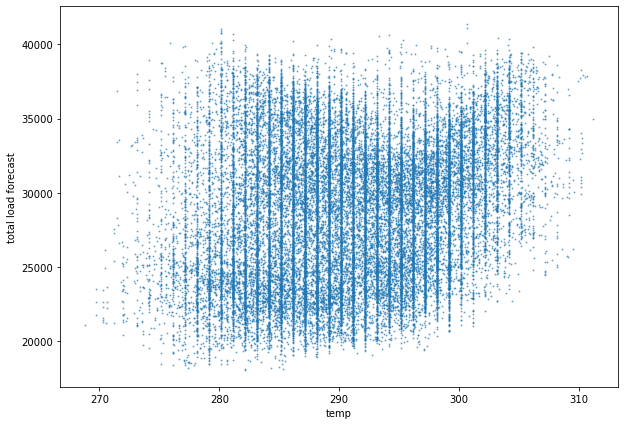

temp | generation hydro pumped storage consumption
-0.2172018330156583


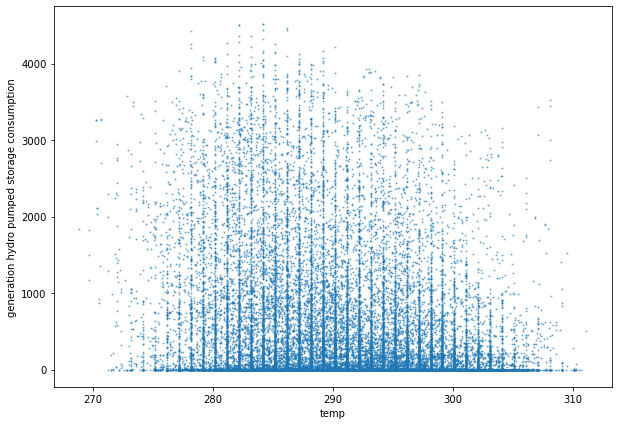

humidity | generation wind onshore
-0.1645065815319493


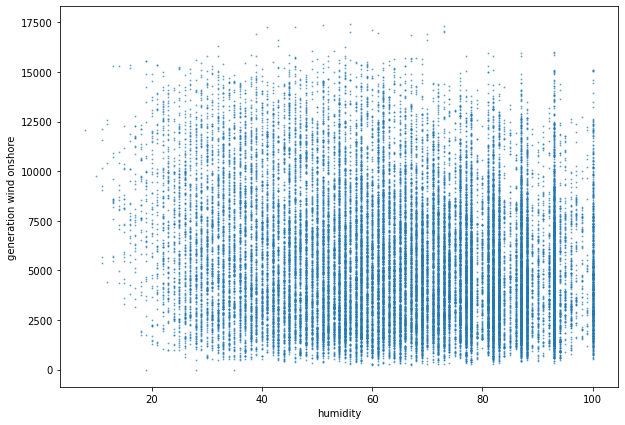

humidity | forecast wind onshore day ahead
-0.16280748038216203


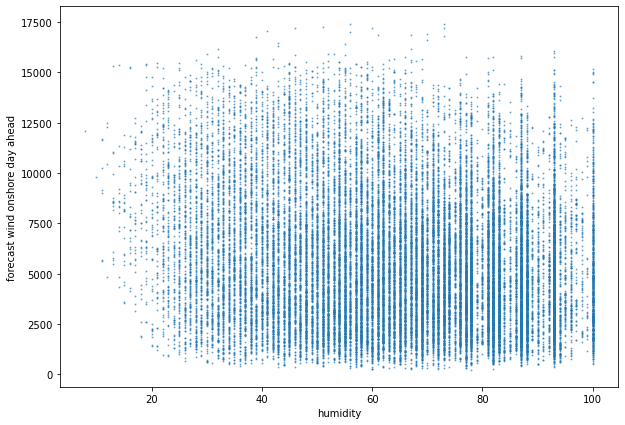

humidity | generation hydro water reservoir
-0.16188488590807917


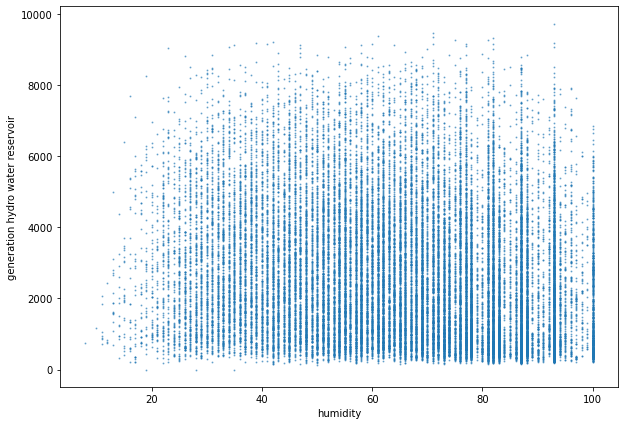

humidity | generation hydro run-of-river and poundage
-0.16064218354795973


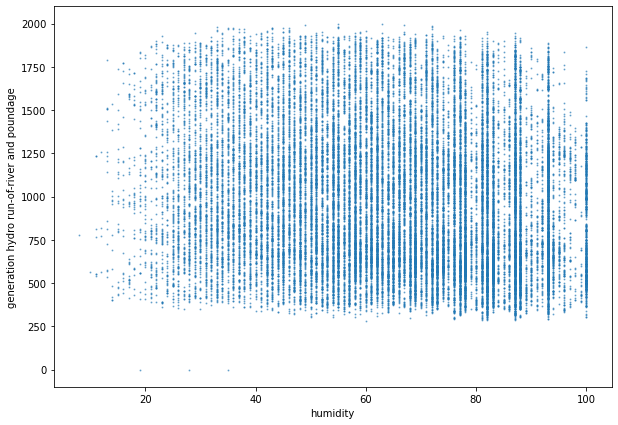

wind_speed | forecast solar day ahead
0.15614803727742468


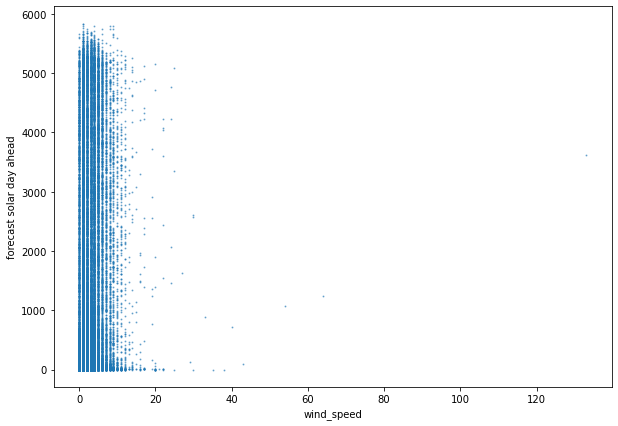

wind_speed | generation solar
0.15597644201986366


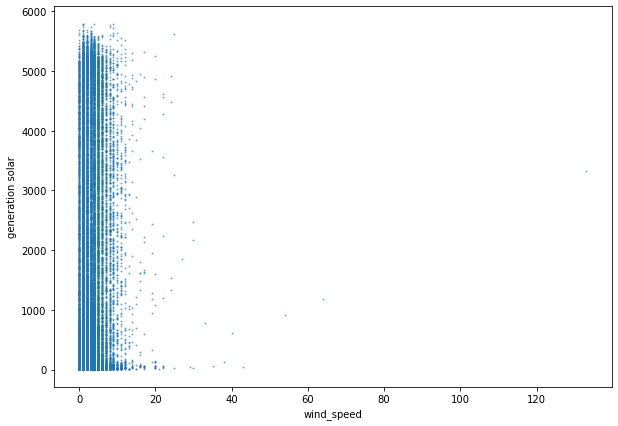

wind_speed | total load forecast
0.14848431147737234


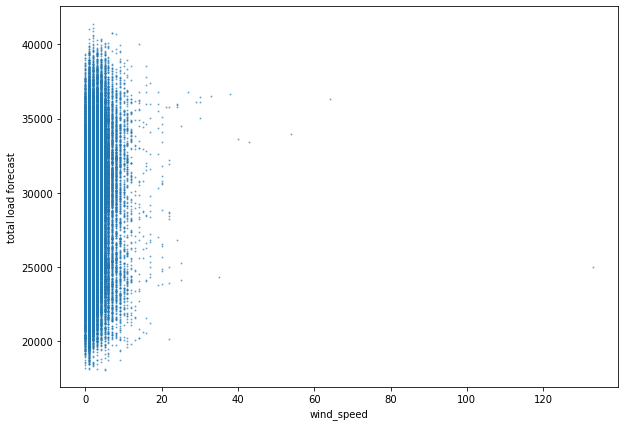

wind_speed | total load actual
0.14819443461774157


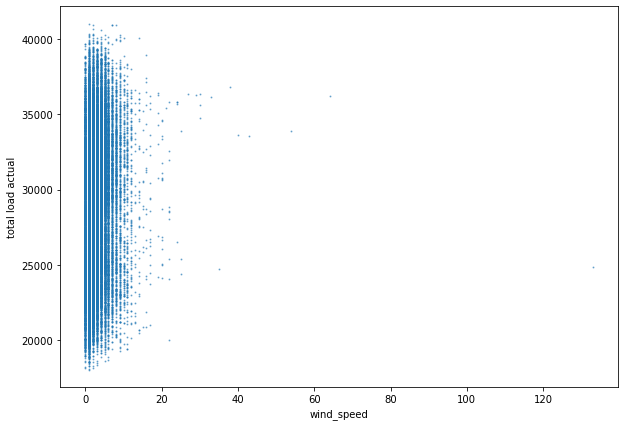

wind_speed | generation hydro run-of-river and poundage
0.1371198492557874


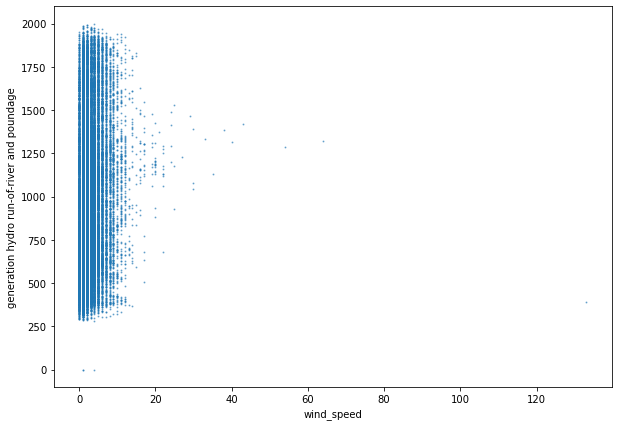

In [77]:
for tup in cList[0:20]:
    print(tup[1],"|",tup[2])
    print(tup[0])
    #sb.pairplot(df[[tup[1],tup[2]]])
    plt.figure(figsize=(10,7))
    plt.scatter(df[[tup[1]]],df[[tup[2]]], color='tab:blue', alpha=.5, s=1)
    #plt.plot(, color='tab:blue', alpha=.5)

    plt.xlabel(tup[1])
    plt.ylabel(tup[2])
    plt.show()
    #plt.legend([f'Degree-{deg} Polynomial Regression', 'Training data'])